## Import Visualization packages 

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Import dataset

In [32]:
# reads the train, test and sample submission csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')



In [31]:
train.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [4]:
test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [5]:
samplesubmission.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


In [7]:
train.shape, test.shape

((700, 37), (300, 36))

## Exploratory Data Analysis

In [39]:
#shows the train and test shapes and sizes
train.shape, test.shape, train.size, test.size

((700, 37), (300, 36), 25900, 10800)

In [16]:
#sets target as total claim amount
target = [col for col in train.columns if col not in test.columns]

In [17]:
#prints out the target
target

['total_claim_amount']

In [18]:
#outputs the train data 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

In [19]:
train.describe()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000,0.0,700.000000
mean,209.528571,39.417143,25777.571429,-27061.000000,551898.977143,1142.142857,11.747143,1.827143,1.001429,1256.950357,1.092857e+06,500211.260000,1.442857,2004.984286,NaN,71900.933214
std,114.746174,9.170472,28239.300780,27874.242557,260076.772911,617.005999,6.987445,1.014970,0.819119,249.616802,2.289793e+06,71731.677629,1.132631,6.013198,NaN,34915.974923
min,0.000000,19.000000,0.000000,-111100.000000,100804.000000,500.000000,0.000000,1.000000,0.000000,433.330000,0.000000e+00,430104.000000,0.000000,1995.000000,NaN,133.330000
25%,123.000000,32.000000,0.000000,-51825.000000,337547.250000,500.000000,6.000000,1.000000,0.000000,1084.702500,0.000000e+00,446952.000000,0.000000,2000.000000,NaN,58933.330000
50%,209.000000,39.000000,5000.000000,-27450.000000,547773.000000,1000.000000,12.000000,1.000000,1.000000,1256.340000,0.000000e+00,465565.000000,1.000000,2005.000000,NaN,77733.330000
75%,283.000000,45.000000,52200.000000,0.000000,775554.500000,2000.000000,17.250000,3.000000,2.000000,1423.890000,0.000000e+00,603417.500000,2.000000,2010.000000,NaN,95503.332500
max,479.000000,64.000000,98800.000000,0.000000,998865.000000,2000.000000,23.000000,4.000000,2.000000,2047.590000,1.000000e+07,620869.000000,3.000000,2015.000000,NaN,153226.670000


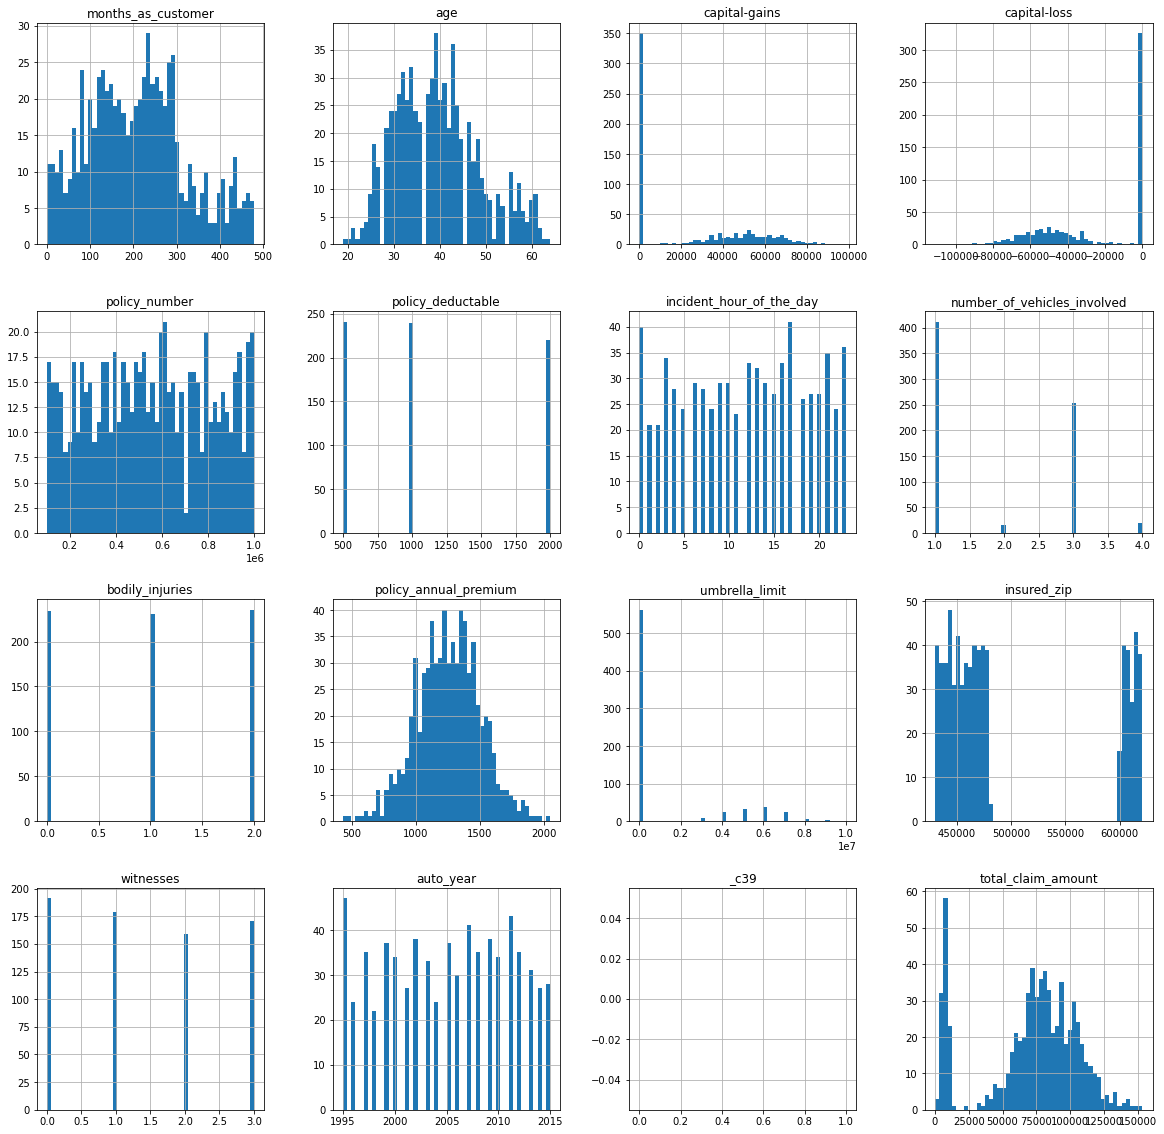

In [40]:
# displays the histogram of the dataset
train.hist(bins=50, figsize= (20, 20))
plt.show()

In [20]:
#grouping pictures into categorical and numerical variables
cat_feat = [feat for feat in train.columns if train[feat].dtype == 'O']
cat_feat

['Customer_ID',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'incident_location',
 'property_damage',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'police_report_available',
 'auto_make',
 'auto_model']

In [23]:
num_feat = [feat for feat in train.columns if feat not in cat_feat]
num_feat

['months_as_customer',
 'age',
 'capital-gains',
 'capital-loss',
 'policy_number',
 'policy_deductable',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'witnesses',
 'auto_year',
 '_c39',
 'total_claim_amount']

In [24]:
train[num_feat].head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
0,239,41,51400,-6300,743092,1000,22,1,0,1325.44,7000000,474898,2,2013,NaN,14386.67
1,108,31,0,0,492224,2000,14,1,0,1175.70,0,608767,2,2006,NaN,76440.00
2,116,30,0,-35500,996253,500,8,3,0,951.46,0,467227,3,2004,NaN,79560.00
3,8,21,0,0,355085,500,21,1,0,1021.90,0,464237,0,2012,NaN,121680.00
4,161,38,60200,0,192524,2000,0,3,2,1133.85,0,439870,2,2003,NaN,80640.00


<AxesSubplot:xlabel='age', ylabel='Density'>

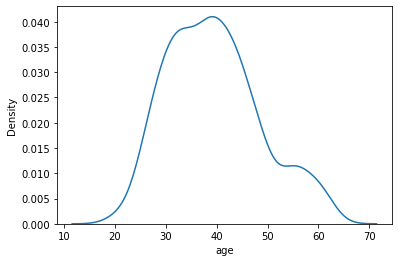

In [53]:
# plots the age data
sns.kdeplot(train.age)

In [75]:
#removing the target and NaN values from the numerical features
remov = ['total_claim_amount', '_c39']
for i in remov:
    num_feat.remove(i)
num_feat

ValueError: list.remove(x): x not in list

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

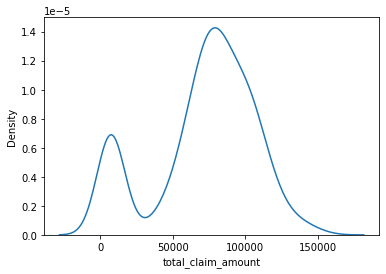

In [26]:
sns.kdeplot(train.total_claim_amount)

In [42]:
# rounds up the mean age to the nearest whole number (float)
mean_age = np.round(train.age.mean())
mean_age

39.0

In [28]:
# correcting errors
_c39_mode = train._c39.mode()
_c39_mode

Series([], dtype: float64)

In [30]:
#correcting the _c39 counts
train._c39.count()

0

## Dataset scaling

In [33]:
#scaling the dataset
scaler = StandardScaler()
cols = num_feat
X = scaler.fit_transform(train[num_feat])
testing = scaler.transform(test[num_feat])
X = pd.DataFrame(data=X, columns=cols)
testing = pd.DataFrame(data=test, columns=cols)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39
0,0.257024,0.172727,0.907981,0.745342,0.735666,-0.230540,1.468375,-0.815526,-1.223442,0.274575,2.581616,-0.353140,0.492253,1.333973,NaN
1,-0.885443,-0.918509,-0.913479,0.971519,-0.229615,1.391349,0.322646,-0.815526,-1.223442,-0.325733,-0.477615,1.514441,0.492253,0.169035,NaN
2,-0.815674,-1.027633,-0.913479,-0.302969,1.709771,-1.041484,-0.536651,1.156385,-1.223442,-1.224712,-0.477615,-0.460157,1.375785,-0.163805,NaN
3,-1.757555,-2.009745,-0.913479,0.971519,-0.757294,-1.041484,1.325159,-0.815526,-1.223442,-0.942318,-0.477615,-0.501870,-1.274810,1.167554,NaN
4,-0.423223,-0.154644,1.219826,0.971519,-1.382791,1.391349,-1.682381,1.156385,1.219951,-0.493510,-0.477615,-0.841809,0.492253,-0.330224,NaN


# Base model

In [34]:
# the model is built using the data (is X) and the target (is train.total_claim_amount)
X_train, X_test, y_train, y_test = train_test_split(X, train.total_claim_amount, test_size = 0.30, random_state = 42)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [64]:
classifier = LogisticRegression()
regressor = LinearRegression()

In [76]:
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
pred = regressor.predict(X_test)
pred2 = regressor.predict(X_train)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [66]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [78]:
print('Training set')
print('classifier mean_squared_error{}'.format(mean_squared_error(y_train.pred2)))
print('\n\ntesting set')
print('classifier mean_squared_error{}'.format(mean_squared_error(y_test.pred)))

Training set


AttributeError: 'Series' object has no attribute 'pred2'

In [61]:
samplesubmission.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


In [62]:
submission_file = samplesubmission.copy()

In [68]:
submission_file.total_claim_amount = regressor.predict(testing)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
submission_file.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

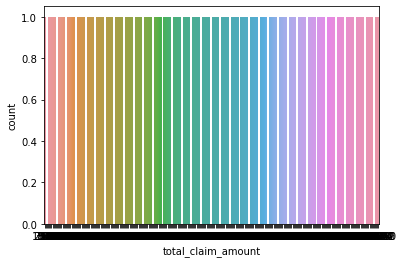

In [71]:
sns.countplot(submission_file.total_claim_amount)

In [74]:
submission_file.to_csv('first_submission.csv', index=False)